<a href="https://colab.research.google.com/github/patrejos/MNIST/blob/main/ModeloPredictivoYGenerativoMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo Predictivo MNIST

El objetivo de este proyecto es resolver uno de los problemas clásicos e iniciales para el machine learnig especificamente el área de visión computacional con la clasificación de digitos de la base de datos MNIST.

### Que modelo se va a usar

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv/train.csv")

<Axes: >

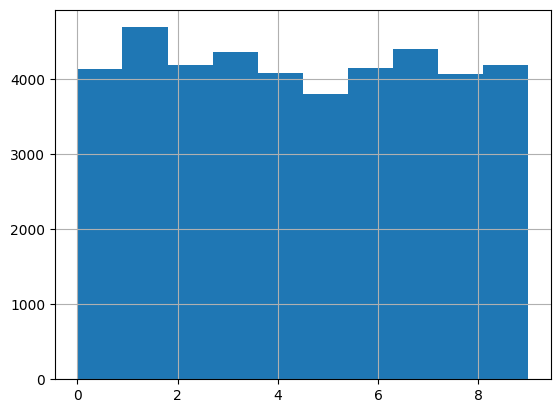

In [ ]:
df['label'].hist()

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[1:]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i]/255
                                                               , Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df.head(1000), test_size=.2, random_state=41)

X_test = test.iloc[:,1:].values
Y_test = test.iloc[:,0].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="label")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred,average="micro"))

<ipython-input-6-9d498f318345>:5: RuntimeWarning: divide by zero encountered in double_scalars
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
<ipython-input-6-9d498f318345>:5: RuntimeWarning: invalid value encountered in double_scalars
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))


[[16  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0]
 [26  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0]
 [23  0  0  0  0  0  0  0  0  0]
 [24  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0]]
0.08


In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Cargar la base de datos MNIST
mnist = fetch_openml("mnist_784")
X = mnist.data.astype("float32")
y = mnist.target.astype("int")

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador Naive Bayes Gaussiano
nb_classifier = GaussianNB()

# Entrenar el clasificador con los datos de entrenamiento
nb_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = nb_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Precisión del clasificador Naive Bayes: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Precisión del clasificador Naive Bayes: 55.16%


In [ ]:
test.iloc[:,0].values

array([3, 1, 6, 1, 3, 6, 8, 4, 8, 2, 5, 4, 6, 1, 2, 1, 2, 7, 9, 4, 3, 3,
       7, 4, 5, 6, 8, 0, 2, 1, 9, 2, 3, 6, 2, 6, 8, 6, 0, 2, 7, 8, 2, 9,
       3, 3, 3, 4, 4, 2, 5, 4, 2, 5, 5, 0, 1, 4, 4, 2, 6, 2, 0, 4, 2, 7,
       0, 5, 4, 4, 7, 5, 8, 5, 6, 7, 0, 5, 5, 1, 6, 2, 2, 2, 2, 6, 3, 0,
       1, 2, 9, 9, 6, 9, 0, 6, 4, 8, 4, 7, 1, 9, 7, 5, 8, 7, 6, 3, 0, 6,
       2, 5, 9, 8, 7, 5, 3, 0, 4, 5, 3, 9, 9, 1, 9, 9, 5, 7, 5, 7, 5, 8,
       1, 7, 4, 8, 2, 9, 9, 5, 4, 9, 5, 7, 1, 1, 9, 2, 1, 6, 5, 3, 4, 6,
       9, 0, 8, 1, 6, 8, 6, 1, 7, 6, 1, 2, 9, 2, 6, 2, 0, 7, 3, 8, 2, 4,
       9, 1, 1, 7, 9, 6, 0, 5, 8, 1, 5, 5, 6, 2, 1, 7, 6, 3, 0, 0, 7, 3,
       0, 3])

In [ ]:
calculate_prior(df,Y='label')

[0.09838095238095237,
 0.11152380952380953,
 0.09945238095238096,
 0.1035952380952381,
 0.09695238095238096,
 0.09035714285714286,
 0.0985,
 0.10478571428571429,
 0.09673809523809523,
 0.09971428571428571]